# Strings, Bytes, and Character Encodings

To do this exercise you'll need to download a text file that I've written named languages.txt (https://learnpythonthehardway.org/python3/languages.txt). This file was created with a list of human languages to demonstrate a few interesting concepts:
    1. How modern computers store human languages for display and processing and how Python calls this strings
    2. How you must "encode" and "decode" Python's strings into a type called bytes
    3. How to handle errors in your string and byte handling.
    4. How to read code and find out what it means even if you've never seen it before.

In addition to that you'll also get a brief glimpse of the Python 3 if-statement and lists for processing a list of things. You don't have to master this code or understand these concepts right away. You'll get plenty of practice in later exercises. For now your job is to get a taste of the future and learn the four topics in the preceding list.

WARNING! This exercise is hard! There's a lot of information in it that you need to understand, and it's information that goes deep into computers. This exercise is complex because Python's strings are complex and difficult to use. I recommend you take this exercise painfully slow. Write down every word you don't understand, and look it up or research it. Take a paragraph at a time if you must. You can continue with other exercises while you study this one, so don't get stuck here. Just chip away at it for as long as it takes.

## Initial Research

I'm gong to teach you how to research a piece of code to expose its secrets. You'll need the languages.txt file for this code to work, so make sure you download it first. The languages.txt file simply contains a list of human language names that are encoded in UTF-8.
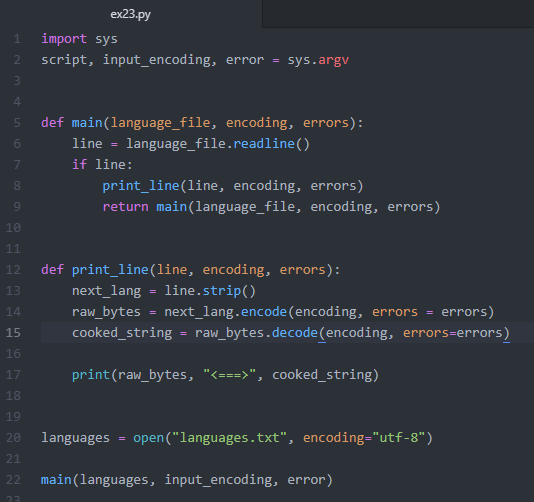

Simply write down a list of each thing you've never seen before. There may be quite a few things that are new, so scan the file a faw times.

Once you have that you'll want to run this Python scriptto play with it. Here are some example commands I used to test it:

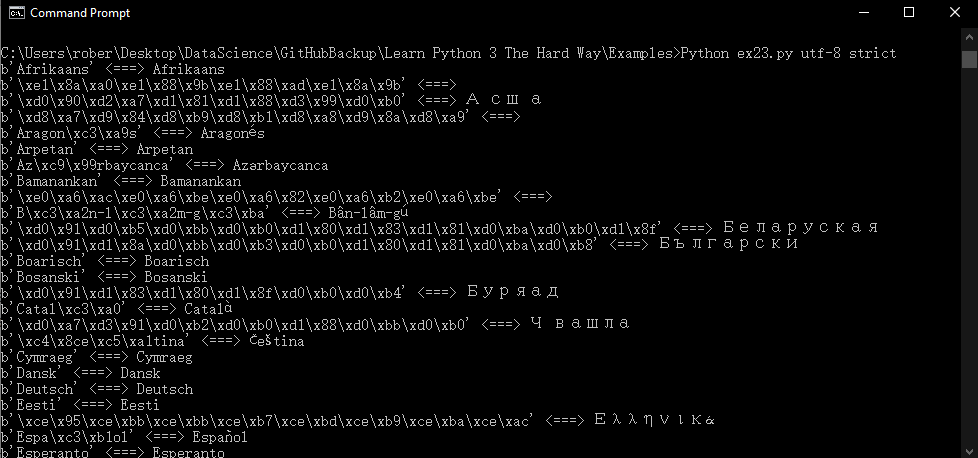

WARNING! You'll notice I'm using images here to show you what you should see. After extensive testing it turns out that so many people have their computers configured to not display UTF-8 that I had to use images so you'll know what to expect. Even my own typesetting system (LaTeX) couldn't handle these encodings, forcing me to use images instead. If you don't see this then your Terminal is most likely not able to display UTF-8 and you should try to fix that.

Self Note! I fixed my command prompt to show UTF-8 characters by switching the properties to:
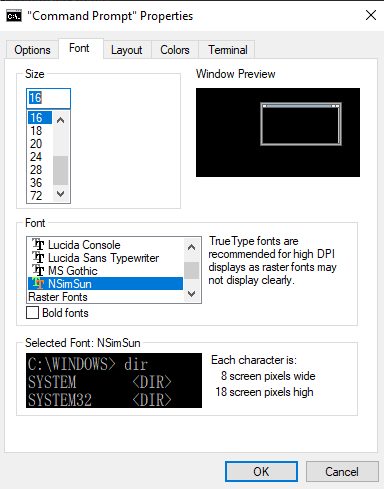
The properties were changed back to default after this exercise.


These examples use the utf-8, utf-16, and big5 encodings to demonstrate the conversion and the types of errors you can get. Each of these names are called a "codex" in Python 3, but you use the parameter "encoding." At the end of this exercise there's a list of the available encodings if you want to try more. I'll cover what all of this outputmeans shortly. You're only trying to get an idea of how this works so we can talk about it.

After you've run it a few times, go through your list of symbols and make a guess as to what they do. When you've written down your guesses try looking the symbols up online to see if you can confirm your hypotheses. Don't worry if you have no idea how to search for them. Just give it a try.

## Switches, Conventions, and Encodings

Before I can get into what this code means, you need to learn some basics about how data is stored in a computer. Modern computers are incredibly complex, but at their cores they are like a huge array of light switches. Computers use electricity to flip switches on or off. These switches can represent 1 for on, or 0 for off. In the old days there were all kinds of weird computers that did more than just 1 or 0, but these days it's just 1s and 0s. One represents energy, on, power, substance. Zero represents off, done, gone, power down, the lack of energy. We call these 1s and 0s "bits."

Now, a computer that lets you work with 1 and 0 would be both horribly inefficient and incredibly annoying. Computers take these 1s and 0s and use them to encode larger numbers. At the small end of a computer we use 8 of these 1s and 0s to encode 256 numbers (0-255). What does "encode" mean, though? It's nothing more than an agreed-upon standard for how a sequence of bits should represnt a number. It's a convention humans picked or stumbled on that says that 00000000 would be 0, 11111111 would be 255, and 00001111 would be 15. There were even huge wars in the early history of computers on nothing more than the order of these bits because they were simply conventions we all had to agree on.

Today we call a "byte" a squence of 8 bits (1s and 0s). In the old days everyone had their own convention for a byte, so you'll still run into people who think this term should be flexible and handle sequences of 9 bits, 7 bits, or 6 bits, but now we just say it's 8 bits. That's our convention, and that convention defines our encoding for a byte. There are further conventions for encoding large numbers using 16, 32, 64, and even more bits if you get into really big math. There's entire standards groups who do nothing but argue about these conventions, then implement them as encodings that eventually turn switches on and off.

Once you have bytes you can start to store and display text by deciding on another convention for how a number maps to a letter. In the early days of computing there were many conventions that mapped 8 or 7 bits (or less or more) onto lists of characters  kept inside a computer. The most popular convention ended up being American Standard Code for Information Interchange, or ASCII. This standard maps a number to a letter. The number 90 is Z, which in bits is 1011010, which gets mapped to the ASCII table inside the computer.

You can try this out in Python right now:

In [1]:
0b1011010

90

In [2]:
ord('Z')

90

In [3]:
chr(90)

'Z'

First, I write the number 90 in binary, then I get the number based on the letter 'Z', then I convert the number to the letter 'Z'. Don't worry about needing to remember this though. I think I've had to do it twice the entire time I've used Python.

Once we hasve the ASSCII convention for encoding a character using 8 bits (a byte), we can then "string" them together to make a word. If I want to write my name, "Zed A. Shaw," I just use a sequence of bytes: [90, 101, 100, 32, 65, 46, 32, 83, 104, 97, 119]. Most of the early text in computers was nothing more than sequences of bytes, stored in memory, that a computer used to display text to a person. Again, this is just a sequence of conventions that turned switches on and off.

The problem with ASCII is that it only encodes English and maybe a few other similar languages. Remember that a byte can hold 256 numbers (0-255, or 00000000-11111111). Turns out, there's a lot more characters than 256 used throughout the world's languages. Different countries created their own encoding conventions for their languages, and that mostly worked, but many encodings could only handle one language. That meant if you want to put the title of an American English book in the middle of a Thai sentence you were kind of in trouble. You'd need one encoding for Thai and one for English.

To solve this problem a group of people created Unicode. It sounds like "encode" and it is meant to be a "universal encoding" of all human languages. The solution Unicode provides is the ASCII table, but it's huge by comparison. You can use 32 bits to encode a Unicode character, and that is more characters that we could possibly find. A 32-bit number means we can store 4,294, 967, 295 characters (2^32), which is enough space for every possible human language and probably a lot of alien ones too. Right now we use the extra space for important things like poop and smile emojis.

We now have a convention for encoding any characters we want, but 32 bits is 4 bytes (32/8 == 4) which means there is so much wasted space in most text we want to encode. We can also use 16 bits (2 bytes), but still there's so much wasted space in most text. The solution is to use a clever convention to encode the most common characters using 8 bits, and then "escape" into larger numbers when we need to encode more characters. That means we have one more convention that is nothing more than a compression encoding, making it possible for most common characters to use 8 bits and then escape out into 16 or 32 bits as needed.

The convention for encoding text in Python is called "UTF-8", which means "Unicode Transformation Format 8 Bits." It is a convention for encoding Unicode characters into sequences of bytes, which are sequences of bits, whch turn sequences of switches on and off. You can also use other conventions (encodings), but UTF=8 is the current standard.

## Disecting the Output

We can now look at the output of the commands shown previously. Let's take just that first command and the first few lines of out:
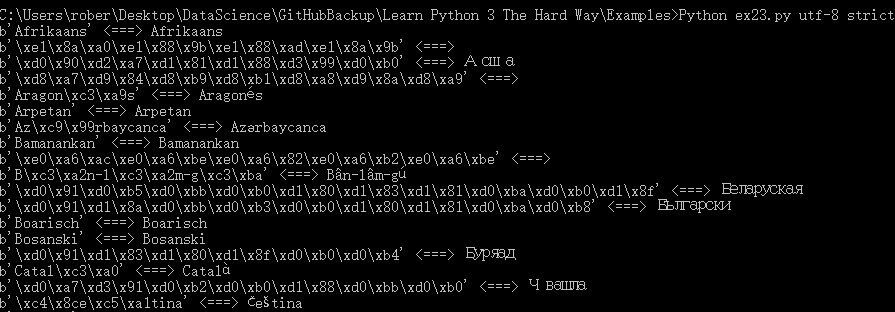

The ex23.py script is taking bytes written inside the b'' (byte string) and converting them to the UTF-8 (or other) encoding you specified. On the left is the numbers for each byte of the UTF-8 (shown in hexadecimal), and the right has the character output as actual UTF-8. The way to think of this is the left side of <===> is the Python numerical bytes, or the "raw" bytes Python uses to store the string. You specify this with the b'' to tell Python this is bytes. These raw bytes are then displayed "cooked" oon the right so you  can see the real characters in your Terminal.

## Disecting the Code

We have an understanding of strings and byte sequences. In Python a string is a UTF-8 encoded sequences of characters for displaying or working with text. The bytes are then the "raw" sequence of bytes that Python uses to store this UTF-8 string and start with a b' to tell Python you are working with raw bytes. This is all based on conventions for how Python wants to work with text. Here's a Python session showing me encoding strings and decoding bytes.

In [6]:
raw_bytes = b'\xe6\x96\x87\xe8\xa8\x80'

In [7]:
utf_string = "文言"

In [8]:
raw_bytes.decode()

'文言'

In [9]:
utf_string.encode()

b'\xe6\x96\x87\xe8\xa8\x80'

In [10]:
raw_bytes == utf_string.encode()

True

In [11]:
utf_string == raw_bytes.decode()

True

All you need to remember is if you have raw bytes, then you must use .decode() to get the string. Raw bytes have no convention to them. They are just sequences of bytes with no meaning other than numbers, so you must tell  Python to "decode this into a UTF string." If you have a string and want to send it, store it, share it, or do some other operation, then usually it'll work, but sometimes Python will throw up an error saying it doesn't know how to "encode" it. Again, Python knows its internal convention, but it has no diea what convention you need. In that case, you must use .encode() to get the bytes you need. 

The way to remember this (even though I look it up almost every time) is to remember the mnemonic DBES, which stands for Decode Bytes, Encode Strings. I say "deebess" in my head when I have to convert bytes and strings. When you have bytes and need a string, decode bytes. When you have a string and need bytes, encode strings.

With that in mind, let's break down the code in ex23.py line-by-line:

    1-2. I start with the usual command line argument handling that you already know
    5. I start the main meat of this code in a function conveniently called main. This will be called at the end of this script to get things going.
    6. This first thing this function does is read one line from the languages file it is given. You have done this before so nothing new here. Just readline as before when dealing with text files.
    8. I use something new. You will learn about this in the second half the book, so consider this a teaser of interesting things to come. This is an if-statement, and it lets you make decisions in your Python code. YOu can test the truth of a variable and, based on that truth, run a piece of code or note run it. In this case I'm testing whether line has something in it. The readline function will return an empty string when it reaches the end of the line and if line simply tests for this empty string. As long as readline gives us something, this will be true, and the code under (indented in, lines 9-10) will run. When this is false, Python will skip lines 9-10.
    9. I call a separate function to do the actual printing of this line. This simplifies my code and makes it easier for me to understand it. If I want to learn what this function does, I can jump to it and study. Once I know what print_line does I can attach my memory to the name print_line and forget about the details.
    10. I have written a tiny yet powerful piece of magic here. I am calling main again inside main. Actually it's not magic since nothing really is magical in programming. All the information you need is there. This looks like I am calling the function inside itself, which seems like